In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 40kB/s 


In [2]:
!nvidia-smi

Tue Apr 27 06:51:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/cell_images/Cell_Images',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(64, 64),
  batch_size=32)                                                             

Found 27588 files belonging to 2 classes.
Using 22071 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/cell_images/Cell_Images',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(64, 64),
  batch_size=32)

Found 27588 files belonging to 2 classes.
Using 5517 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Parasitized', 'Uninfected']


In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


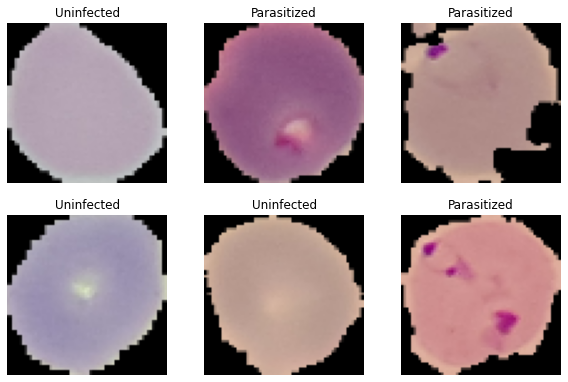

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8407921


In [31]:
#Building the cnn 

#Initialising the cnn 
cnn = tf.keras.models.Sequential()

#Step1 Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding ='same',activation='relu',input_shape = [64,64,3]))

#Step2 Pooling 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#Adding a second Convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',activation='relu',kernel_size=3))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#Adding a third Convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',activation='relu',kernel_size=3))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#Adding a Fourth Convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',activation='relu',kernel_size=3))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



# Step4 
cnn.add(tf.keras.layers.Flatten())

# Step5
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.3))
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.3))

# Step6
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))



In [32]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 128)        

In [35]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [37]:
#compiling the cnn
cnn.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

#Training the cnn on the training data and evaluating it on the validation data 
history=cnn.fit(train_ds,validation_data=val_ds,callbacks=[callback],batch_size=32,epochs=25)

Epoch 1/25
690/690 [==============================] - 165s 238ms/step - loss: 0.1738 - accuracy: 0.9492 - val_loss: 0.1708 - val_accuracy: 0.9547
Epoch 2/25
690/690 [==============================] - 52s 75ms/step - loss: 0.1438 - accuracy: 0.9532 - val_loss: 0.1248 - val_accuracy: 0.9605
Epoch 3/25
690/690 [==============================] - 52s 74ms/step - loss: 0.1304 - accuracy: 0.9588 - val_loss: 0.1215 - val_accuracy: 0.9614
Epoch 4/25
690/690 [==============================] - 51s 74ms/step - loss: 0.1259 - accuracy: 0.9589 - val_loss: 0.1618 - val_accuracy: 0.9560
Epoch 5/25
690/690 [==============================] - 52s 75ms/step - loss: 0.1220 - accuracy: 0.9577 - val_loss: 0.1254 - val_accuracy: 0.9598
Epoch 6/25
690/690 [==============================] - 51s 74ms/step - loss: 0.1149 - accuracy: 0.9619 - val_loss: 0.1653 - val_accuracy: 0.9463
Epoch 7/25
690/690 [==============================] - 52s 74ms/step - loss: 0.1095 - accuracy: 0.9605 - val_loss: 0.1243 - val_accurac

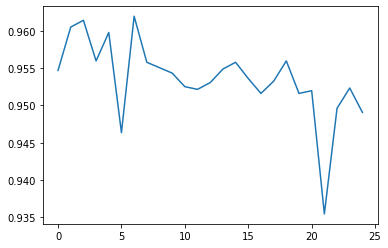

In [38]:
plt.plot(history.history['val_accuracy'])